Importar imagen del juego


In [2]:
#importamos las librerias
import numpy as np #Numerical Python
import pandas as pd #Procesamiento de datos
import matplotlib.pyplot as plt #Visualización de datos 
import seaborn as sns #Visualización de datos 
import matplotlib #Visualización de datos 


In [3]:
df = pd.read_csv("/content/high_diamond_ranked_10min.csv")
df.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Principal EDA for better understanding

In [4]:
def eda():
  print('Columns names:\n', df.columns)
  print('Columns formats:\n', df.dtypes)
  print('Rows per variable:\n', df.count())
  print('Missing values:\n', df.isnull().sum())
  print('Descriptive statistics:\n', df.describe())

In [5]:
eda()

Columns names:
 Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')
Columns formats:
 gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestr

Text(-1.0, 1.1, 'Distribución de las clases')

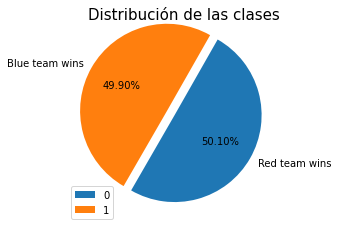

In [19]:
labels = 'Red team wins', 'Blue team wins'
sizes = [15, 30]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


plt.pie(df["blueWins"].value_counts(),explode=explode, labels=labels,autopct='%1.2f%%',startangle=600)
plt.legend(labels=['0','1'], loc='lower left')

#plt.text(-0.9,1.18,"Gráfico circular",fontsize=15,weight=300)
plt.text(-1.0, 1.10,"Distribución de las clases",fontsize=15,weight=300)# style='italic')

## Observations:

* The EDA show us that we don't have missing values, this is good because we don't have to deal with missing ones.

* All the variables are numeric

* At this point, we see that the data set is pretty balanced, near to 50/50 of our target variable. Now we have to do another analysis, because we don't know what variable or variables are responsible for one win or lose.

## Multivariate analysis

What are we gonna do? Well, we'll compare all the variables with each other, so we can see what variables have more weight in the final results.

Also, we'll use **Barplot** and **Heatmap** graphs because they will help us, visually, to better understand this point.

Let's go!

In [20]:
#First, define our variable
correlation=df.corr()["blueWins"].drop(index="blueWins").sort_values(ascending=False)

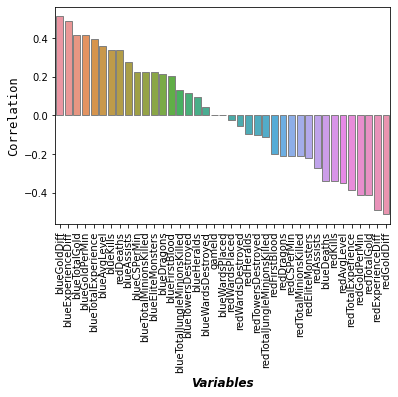

In [26]:
#Creación de barplot 
sns.barplot(x = correlation.index,
            y = correlation.values,edgecolor = 'gray')
#Etiquetas eje X con rotación
plt.xticks(rotation = 90)
plt.xlabel('Variables', size=12, fontstyle='italic', weight=1000)
plt.ylabel('Correlation', size=12, family='monospace')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


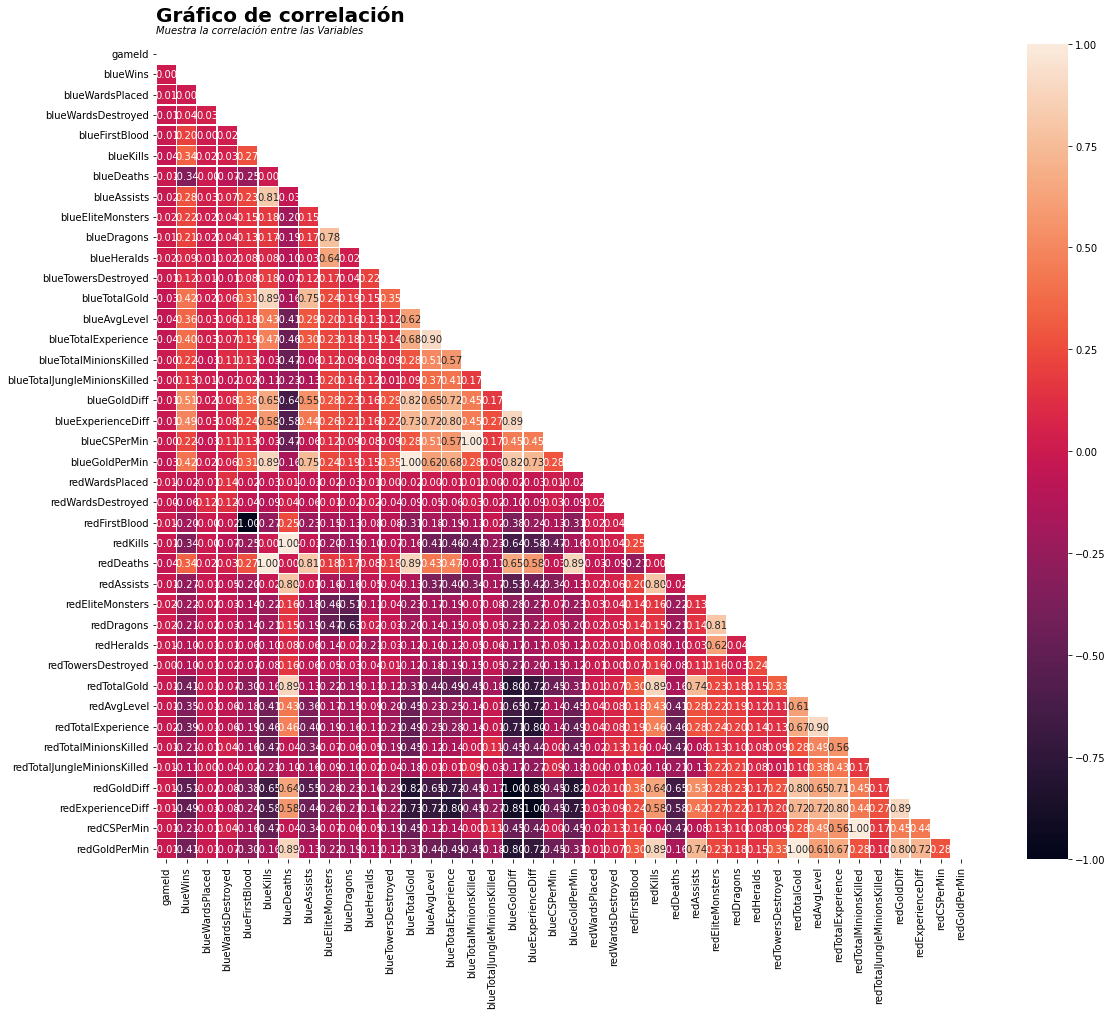

In [28]:
#Creamos mapa de calor para ver la correlación, se pone en forma de triangulo para faciliar la comprensión
# Tamaño de las figura
plt.rcParams["figure.figsize"]=(20,15)
# Creamos una matriz vacia, para que sea mas facil ver la correlación
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
# Creación del mapa de calor
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,linewidth=0.5,square=True,fmt='.2f',mask=mask)
plt.text(0,-1.1,"Gráfico de correlación",fontsize=20,weight=600)
plt.text(0,-0.5,"Muestra la correlación entre las Variables",style="italic")
plt.show()
plt.rcParams["figure.figsize"] = (10,8)

In [77]:
def filtered(): 
  while df.corr() > 0.9:
    sns.heatmap(filtered(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            square=True,
            fmt='.2f',
            mask=mask)
    return False
plt.show()
plt.rcParams["figure.figsize"] = (10,8)


In [76]:
def corrFutures():
  for Columns in df.corr.columns:
      if any df.corr()[columns] > 0.90


SyntaxError: ignored